### PRE-PROCESSING AND FEATURE SELECTION

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read data
data = pd.read_csv("eng_pp_9523_eda_pivoted.csv")

In [3]:
#import numpy as np

# Assuming 'Month' column contains month names as strings
#month_map = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}  # Create a dictionary mapping month names to numbers

# Convert 'Month' to integer (considering potential errors)
#data['Month'] = data['Month'].apply(lambda x: month_map.get(x, np.nan))  # Use np.nan for missing values


# Select data for the last 24 months (assuming 'Year' and 'Month' columns)
#last_24_months = data[(data['Year'] == 2023) & (data['Month'] >= 3)]  # Modify for different start month

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Encode the "Month" column
data["Month"] = le.fit_transform(data["Month"])

In [7]:
# Target variable
target = "Terraced"  # Change to desired property type for prediction

In [8]:
# Features (excluding target, Year, and Month)
features = [col for col in data.columns if col not in [target, "Year", "Month"]]

In [6]:
# Encode categorical features (if any)
#le = LabelEncoder()
#for col in features:
#  if data[col].dtype == object:
#    data[col] = le.fit_transform(data[col])


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

### 2. MODEL TRAINING AND PREDICTION

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Train a Random Forest Classifier model (you can try other models as well)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on the test set
y_pred_others = model.predict(X_test)


In [11]:
y_pred_others

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 3. PERFORMANCE EVALUATION

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_others)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [16]:
# Classification Report (precision, recall, F1-score for each class)
print(classification_report(y_test, y_pred_others))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4455328
           1       1.00      1.00      1.00     75470

    accuracy                           1.00   4530798
   macro avg       1.00      1.00      1.00   4530798
weighted avg       1.00      1.00      1.00   4530798



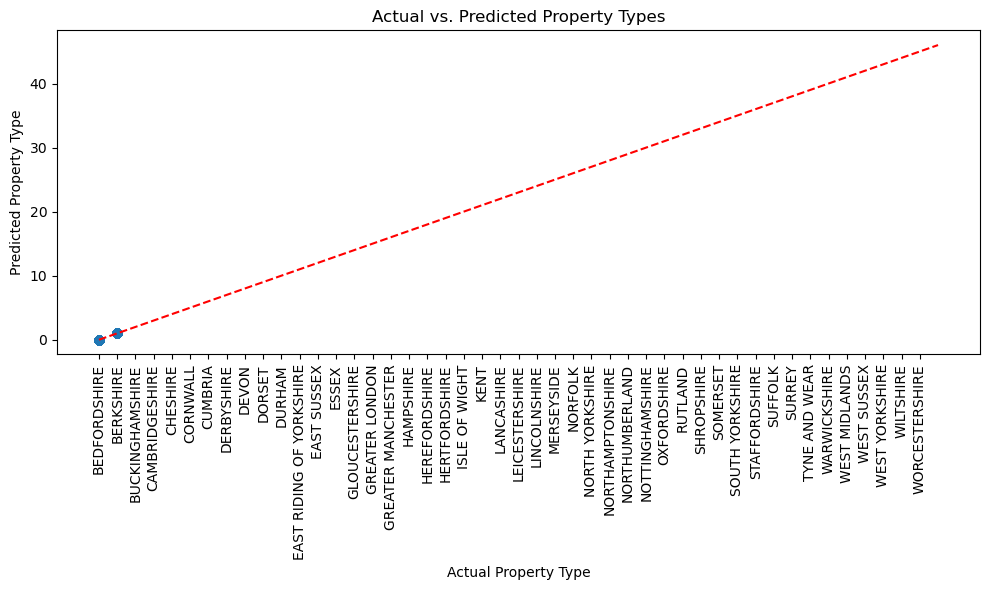

In [22]:
import matplotlib.pyplot as plt

# Get class labels (assuming target variable encodes property types)
class_labels = le.inverse_transform(range(len(le.classes_)))  # Get original property type names

# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_others)
plt.xlabel("Actual Property Type")
plt.ylabel("Predicted Property Type")
plt.title("Actual vs. Predicted Property Types")

# Add diagonal line for perfect prediction
plt.plot([0, len(class_labels)], [0, len(class_labels)], color='red', linestyle='--', label='Perfect Prediction')

# Set labels on x-axis
plt.xticks(range(len(class_labels)), class_labels, rotation=90)
plt.tight_layout()
plt.show()
